### Visualizing the Distribution of the Arab Observer and Normalizing Across Time

This notebook is to create the initial visualizations of the distributions across the entirety of the Arab Observer corpus, and then visualize the normalized distribution of the HathiTrust volumes

In [8]:
#Import required libraries
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)
import warnings
warnings.filterwarnings('ignore')

In [56]:
#Import and manipulate required datasets


In [18]:
# Full Corpus
full_corpus_df = pd.read_csv('./data/arab_observer_corpus_cleaned.csv')
#Distinguish origin of data 
full_corpus_df.type[full_corpus_df.type == 'hathi_trust'] = 'HathiTrust Volumes'
full_corpus_df.type[full_corpus_df.type == 'collected_issues'] = 'Collected Issues'
full_corpus_df.sort_values(by=['datetime', 'binned', 'page_number'], inplace=True)
#Order datasets temporally
full_corpus_df['date_bin'] = full_corpus_df.date.astype(str)+'_'+full_corpus_df.binned.astype(str)
full_corpus_df['date_page'] = full_corpus_df.date.astype(str)+'_'+full_corpus_df.page_number.astype(str)
full_corpus_df['datetime'] = pd.to_datetime(full_corpus_df['date'], format='%Y-%B-%d', errors='coerce')
full_corpus_dates = full_corpus_df.date.unique().tolist()

In [19]:
#Turn data into json
full_corpus_url = './data/arab_observer_corpus_cleaned.json'
full_corpus_df.to_json(full_corpus_url, orient='records')

In [20]:
# Congo Corpus
congo_corpus_df = pd.read_csv('./data/arab_observer_congo_corpus.csv')
congo_corpus_df['date_bin'] = congo_corpus_df.date.astype(str)+'_'+congo_corpus_df.binned.astype(str)
congo_corpus_dates = congo_corpus_df.date.unique().tolist()
congo_corpus_df['datetime'] = pd.to_datetime(congo_corpus_df['date'], format='%Y-%B-%d', errors='coerce')
congo_corpus_df['date_page'] = congo_corpus_df.date.astype(str)+'_'+congo_corpus_df.page_number.astype(str)
congo_corpus_df = congo_corpus_df.sort_values(by=['datetime','binned', 'page_number'])

In [21]:
#Turn data into json
congo_corpus_url = './data/arab_observer_congo_cleaned.json'
congo_corpus_df.to_json(congo_corpus_url, orient='records')

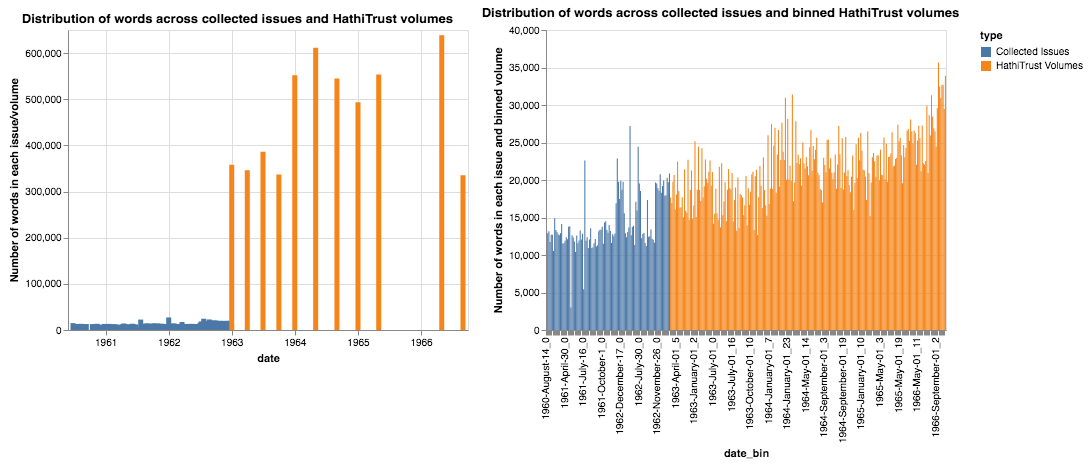

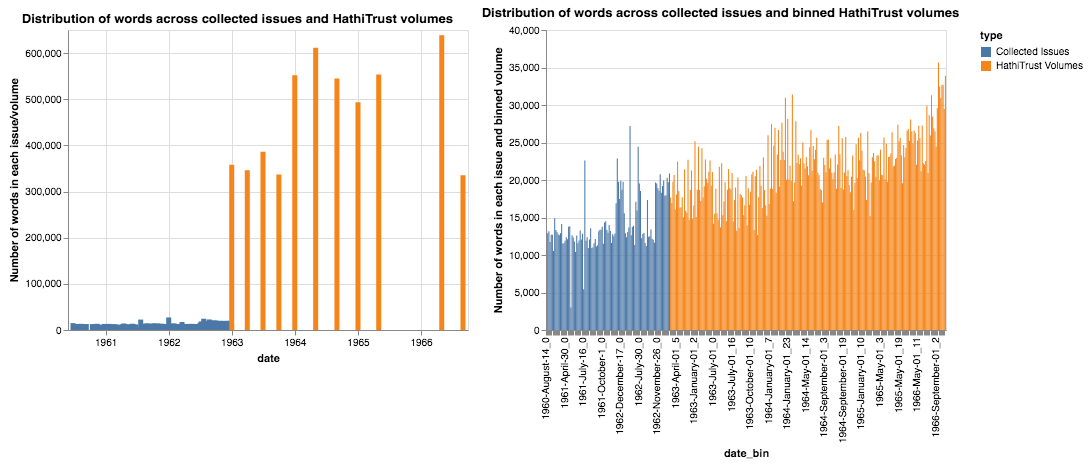

In [11]:
alt.data_transformers.enable('json')
# Visualize
chart = alt.Chart(full_corpus_url).mark_bar().encode(
    x=alt.X('date:T', sort=full_corpus_dates),
    y=alt.Y('sum(cleaned_nltk_counts):Q', axis=alt.Axis(title='Number of words in each issue/volume')),
    color='type:N'
).properties(
    title='Distribution of words across collected issues and HathiTrust volumes'
)
chart1 = alt.Chart(full_corpus_url).mark_bar().encode(
    x=alt.X('date_bin:O', sort=full_corpus_dates),
    y=alt.Y('sum(cleaned_nltk_counts):Q', axis=alt.Axis(title='Number of words in each issue and binned volume')),
    color='type:N'
).properties(
    title='Distribution of words across collected issues and binned HathiTrust volumes',
    width=400
)
chart | chart1

In [8]:
# Visualizing Congo counts over corpus

In [15]:
alt.data_transformers.enable('json')
df_summer = congo_corpus_df.loc[congo_corpus_df.datetime < '1960-09-01']
df_summer_url = './data/arab_observer_congo_cleaned_summer_1960.json'
df_summer.to_json(df_summer_url, orient='records')
charts = alt.Chart(df_summer_url).mark_bar().encode(
    x=alt.X('sum(word_counts)', axis=alt.Axis(title='')),
    y=alt.Y('date:O', axis=alt.Axis(title=''), sort=congo_corpus_dates)
).properties(
    width=250,
    height=150,
    title='Frequency of Congo Over Summer 1960'
)

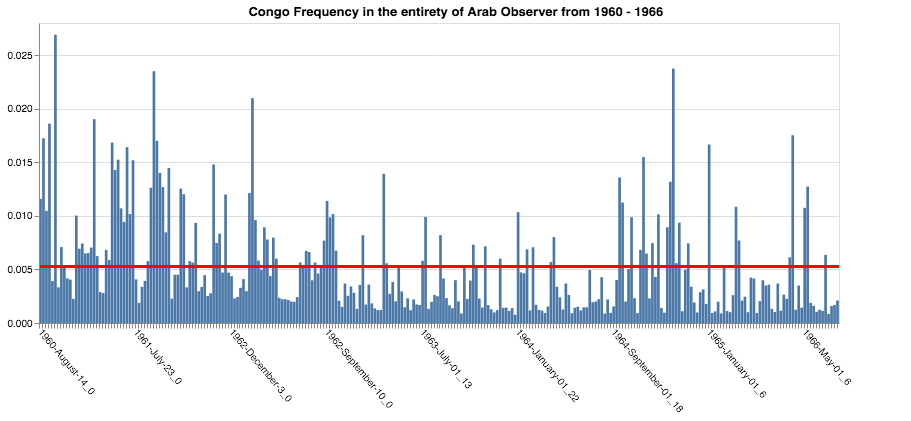

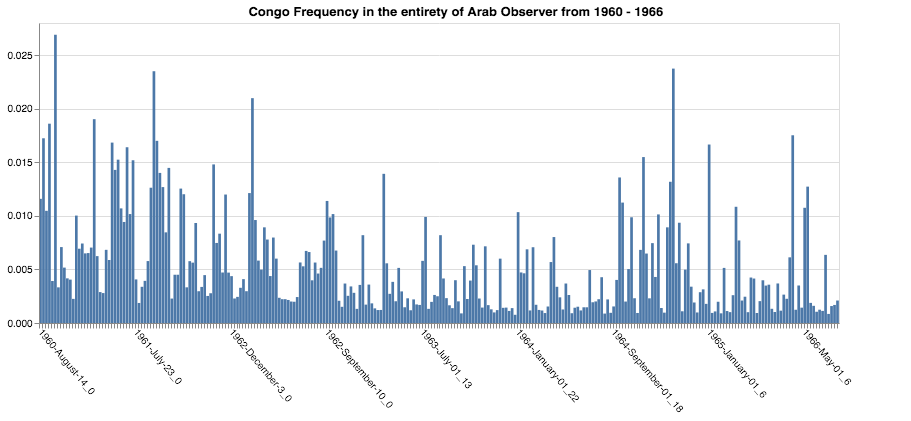

In [16]:
alt.data_transformers.enable('json')
df_grouped = congo_corpus_df.groupby('date_bin')['word_counts'].sum().reset_index()
df_tokens = congo_corpus_df.groupby('date_bin')['cleaned_nltk_counts'].sum().reset_index()
dfs = df_grouped.merge(df_tokens, on='date_bin')
dfs['avg'] = dfs.word_counts / dfs.cleaned_nltk_counts
dfs_url = './data/arab_observer_corpus_cleaned_grouped.json'
dfs.to_json(dfs_url, orient='records')
alt.themes.enable('opaque')
chart = alt.Chart(dfs_url).mark_bar().encode(
    x=alt.X('date_bin:O', axis=alt.Axis(title='', labelAngle=50), sort=congo_corpus_dates),
    y=alt.Y('avg:Q', axis=alt.Axis(title=''))
)
rule = alt.Chart(dfs).mark_rule(color='red',size=3).encode(
    y='mean(avg):Q',
    
)


(chart + rule).properties(
    width=800,
    title='Congo Frequency in the entirety of Arab Observer from 1960 - 1966'
)